In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# read DataFrame
df_rev = pd.read_excel("olive oil company.xlsx",sheet_name="Reviews")
df_prod = pd.read_excel("olive oil company.xlsx",sheet_name="Products")

In [4]:
# --- Data Analysis ---
print("Product Stock Summary:")
print(df_prod[["product_name", "stock_quantity"]])

Product Stock Summary:
  product_name  stock_quantity
0    Olive Oil             100
1   Almond Oil             150
2    Argan Oil              80
3  Coconut Oil             200
4  Avocado Oil             120


C:\Users\ahmed\AppData\Local\Temp\ipykernel_17404\2222828629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_name", y="stock_quantity", data=df_prod, palette="viridis")


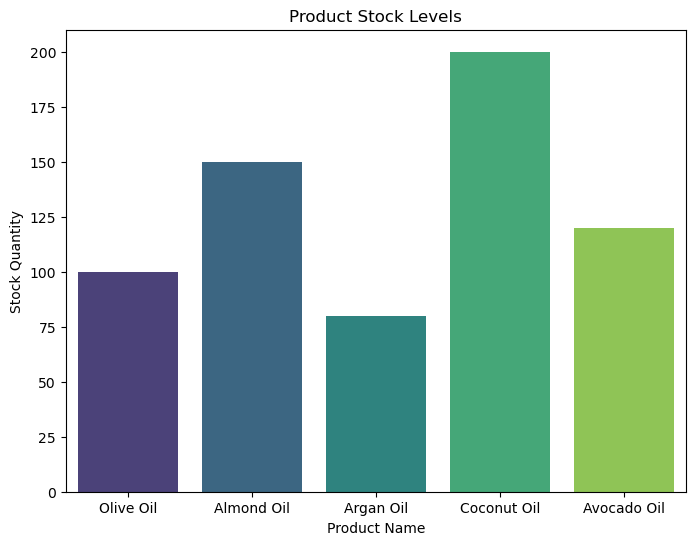

C:\Users\ahmed\AppData\Local\Temp\ipykernel_17404\2222828629.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_name", y="selling_price", data=df_prod, palette="coolwarm")


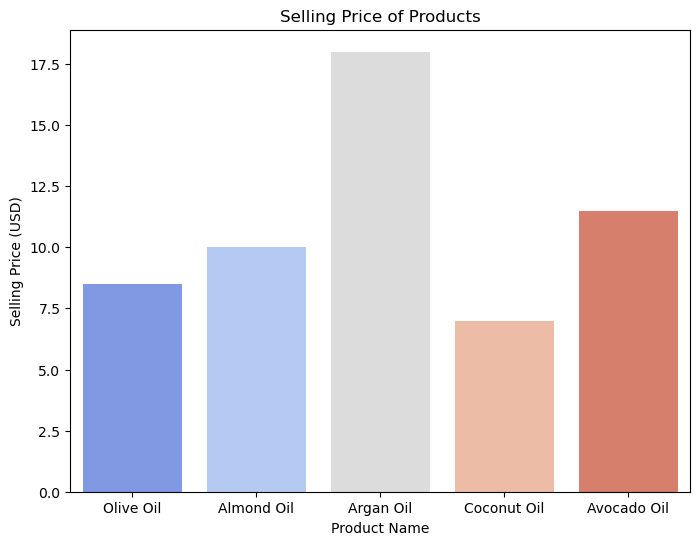

In [5]:
# --- Visualizations ---
# 1. Stock quantity visualization
plt.figure(figsize=(8, 6))
sns.barplot(x="product_name", y="stock_quantity", data=df_prod, palette="viridis")
plt.title("Product Stock Levels")
plt.ylabel("Stock Quantity")
plt.xlabel("Product Name")
plt.show()

# 2. Selling price visualization
plt.figure(figsize=(8, 6))
sns.barplot(x="product_name", y="selling_price", data=df_prod, palette="coolwarm")
plt.title("Selling Price of Products")
plt.ylabel("Selling Price (USD)")
plt.xlabel("Product Name")
plt.show()

In [24]:
# --- Sentiment Analysis ---
# Using nltk SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df_rev["sentiment_score"] = df_rev["review_text"].apply(lambda review: sia.polarity_scores(review)["compound"])
df_rev["predicted_sentiment"] = df_rev["sentiment_score"].apply(
    lambda score: "Positive" if score > 0.05 else "Negative")

# Print Sentiment Analysis Results
print("Sentiment Analysis Results:")
print(df_rev[["review_text","label","predicted_sentiment"]])


Sentiment Analysis Results:
                                     review_text     label predicted_sentiment
0      Great quality products! Highly recommend.  Positive            Positive
1  Excellent customer service and fast delivery.  Positive            Positive
2              Product quality was inconsistent.  Negative            Negative
3            Overpriced compared to competitors.  Negative            Negative
4           Packaging was eco-friendly and neat.  Positive            Positive
5              The coconut oil left a bad smell.  Negative            Negative
6   Easy ordering process, but delayed shipping.  Negative            Negative
7          Avocado oil was of excellent quality!  Positive            Positive


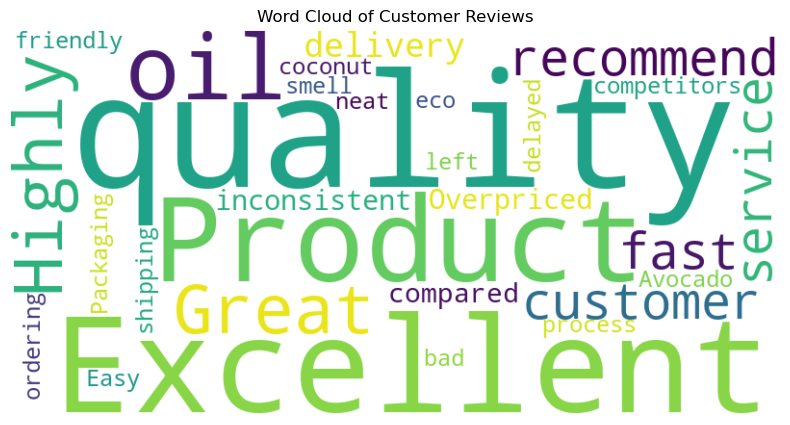

In [26]:
# --- Word Cloud for Reviews ---
all_reviews = " ".join(df_rev["review_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Customer Reviews")
plt.show()

In [28]:
# --- Sentiment Model Training ---
# 1. Preparing data for training
X = df_rev["review_text"]
y = df_rev["label"]

In [30]:
# Convert text to feature vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

In [32]:
# 2. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# 3. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
[[0 1]
 [0 1]]


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# Example: Predict sentiment for new reviews
new_reviews = ["good quality and price","bad"]
new_reviews_vectorized = vectorizer.transform(new_reviews)
predicted_sentiments = model.predict(new_reviews_vectorized)
print("Predicted Sentiments for New Reviews:", predicted_sentiments)

Predicted Sentiments for New Reviews: ['Positive' 'Negative']
